# QUACK Workshop: PCA in R
## Fall 2017
## Samy Abdel-Ghaffar & David Bourgin

1. [Sam] Motivation - dimensionality reduction (visualization, creating an index or simplifying correlated data, denoising, finding latent variables) with examples
2. [Sam] The algorithm. pca vs least squares, the assumptions (normal in multi dimensions, orthogonal, pairwise correlations), basis function rotation, eigenfaces example
[Breakout session]
3. [David] Factor analysis vs. PCA, algorithm vs model, assumptions, various rotations, examples.
[Breakout session]
4. [David] Visualization, maps example, non-linear approaches
[Breakout session]
5. [Sam] Denoising, ica vs  pca, fsl ica example
[Breakout session]
6. [David] Exploratory vs confirmatory factor analysis and hypotheses testing.

# Motivation: Why PCA?

*From wikipedia:*

>Principal Components Analysis (more commonly known as PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

Ok, that's great and all, but as with most wikipedia definitions of statistical procedures, I don't really understand what this concise definition is telling me until I understand what the statistical procedure in question does from a more intuitive perspective.

Perhaps a better way to understand PCA is to motivate the scenarios when one would want to use it, through examples. Once you see the powerful results of conducting PCA, it will hopefully be easier to understand exactly what it does, and how it does it. So let's begin...

## Visualizing High-Dimensional Data



## Finding Latent Variables

## Reducing Dimensionality

Principal Components Regression can remove noise from your data first, which can result in less over-fitting.

## Denoising Data



# PCA Basics

## Background

### Vector (Linear) Spaces and Linear Subspaces

### Projections & Rotations

### Basis Functions (Vectors)

### Manifolds

## Assumptions

taken from: https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf

I. Linearity
Linearity frames the problem as a change
of basis. Several areas of research have
explored how applying a nonlinearity prior
to performing PCA could extend this algorithm
- this has been termed kernel PCA.


III. Large variances have important dynamics.
This assumption also encompasses the belief
6A sidebar question: What if xi are not Gaussian distributed?
Diagonalizing a covariance matrix might not produce
satisfactory results. The most rigorous form of removing
redundancy is statistical independence.
P(y1, y2) = P(y1)P(y2)
where P(·) denotes the probability density. The class of algorithms
that attempt to find the y1, , . . . , ym that satisfy this
statistical constraint are termed independent component analysis
(ICA). In practice though, quite a lot of real world data
are Gaussian distributed - thanks to the Central Limit Theorem
- and PCA is usually a robust solution to slight deviations
from this assumption.
that the data has a high SNR. Hence, principal
components with larger associated variances
represent interesting dynamics, while
those with lower variancees represent noise.

### Normally Distributed

II. Mean and variance are sufficient statistics.
The formalism of sufficient statistics captures
the notion that the mean and the variance
entirely describe a probability distribution.
The only zero-mean probability distribution
that is fully described by the variance
is the Gaussian distribution.
In order for this assumption to hold, the
probability distribution of xi must be Gaussian.
Deviations from a Gaussian could invalidate
this assumption6


### Orthogonal Dimensions

IV. The principal components are orthogonal.
This assumption provides an intuitive simplification
that makes PCA soluble with
linear algebra decomposition techniques.
These techniques are highlighted in the two
following sections.

### Pairwise Correlations

## Algorithm

### Eigenvector Decomposition of Covariance Matrix (Minimizing Projection Error)

Explain cost function that is being minimized



Put cool gif I found in

Give link to proof in that goood book

# TODO - Walk through doing PCA "by hand":
1. Demean Data (and scale?)
2. Create Covariance matrix
3. Eigenvalue Decomposition
3.5 Normalize the eignevectors to unit length
4. Make scree plot and determine number of PCs to use.
5. Create scores by multiplying data by eigenvectors (and all PCs)
6. Transform data back to original by multiplying the scores by the eigenvalues and adding the mean back in.

7. Verify we're correct by using the built in PCA function

In [1]:
#install.packages("ade4")
#install.packages("fields")
library(ade4)
library(fields)

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-1 (2017-07-02) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps


In [2]:
# load the olympic decathalon dataset and have a look at it
data(olympic)
str(olympic)

List of 2
 $ tab  :'data.frame':	33 obs. of  10 variables:
  ..$ 100 : num [1:33] 11.2 10.9 11.2 10.6 11 ...
  ..$ long: num [1:33] 7.43 7.45 7.44 7.38 7.43 7.72 7.05 6.95 7.12 7.28 ...
  ..$ poid: num [1:33] 15.5 15 14.2 15 12.9 ...
  ..$ haut: num [1:33] 2.27 1.97 1.97 2.03 1.97 2.12 2.06 2 2.03 1.97 ...
  ..$ 400 : num [1:33] 48.9 47.7 48.3 49.1 47.4 ...
  ..$ 110 : num [1:33] 15.1 14.5 14.8 14.7 14.4 ...
  ..$ disq: num [1:33] 49.3 44.4 43.7 44.8 41.2 ...
  ..$ perc: num [1:33] 4.7 5.1 5.2 4.9 5.2 4.9 5.7 4.8 4.9 5.2 ...
  ..$ jave: num [1:33] 61.3 61.8 64.2 64 57.5 ...
  ..$ 1500: num [1:33] 269 273 263 285 257 ...
 $ score: num [1:33] 8488 8399 8328 8306 8286 ...


In [3]:
# demean the data
olympicMat = as.matrix(olympic$tab)
olympicDemean = scale(olympicMat, center=TRUE, scale=FALSE)
class(olympicDemean)

[1] "matrix"

In [4]:
olympicDemean

,100,long,poid,haut,400,110,disq,perc,jave,1500
1,0.05363636,0.29666667,1.503636364,0.28727273,-0.376666667,0.08121212,6.926060606,-0.03939394,1.88121212,-7.088485
2,-0.32636364,0.31666667,0.993636364,-0.01272727,-1.566666667,-0.58878788,2.006060606,0.36060606,2.32121212,-3.018485
3,-0.01636364,0.30666667,0.223636364,-0.01272727,-0.986666667,-0.23878788,1.306060606,0.46060606,4.72121212,-12.838485
4,-0.57636364,0.24666667,1.043636364,0.04727273,-0.216666667,-0.32878788,2.446060606,0.16060606,4.60121212,9.071515
5,-0.17636364,0.29666667,-1.056363636,-0.01272727,-1.836666667,-0.64878788,-1.153939394,0.46060606,-1.97878788,-19.398485
6,-0.36636364,0.58666667,-0.396363636,0.13727273,-0.936666667,-0.86878788,0.706060606,0.16060606,-7.25878788,-1.968485
7,-0.01636364,-0.08333333,0.143636364,0.07727273,0.063333333,-0.65878788,-0.673939394,0.96060606,2.16121212,15.161515
8,-0.14636364,-0.18333333,1.363636364,0.01727273,-1.066666667,-0.68878788,-1.033939394,0.06060606,3.56121212,-10.178485
9,-0.04636364,-0.01333333,0.543636364,0.04727273,-0.126666667,-0.38878788,0.006060606,0.16060606,7.02121212,-6.418485
10,0.03363636,0.14666667,1.273636364,-0.01272727,-0.676666667,-0.28878788,5.666060606,0.46060606,0.04121212,16.201515


In [5]:
# create the covariance matrix
olympicDemeanCov = cov(olympicDemean)
olympicDemeanCov

,100,long,poid,haut,400,110,disq,perc,jave,1500
100,0.059205114,-0.03995625,-0.06740426,-0.003336648,0.157696875,0.07871420,-0.04273523,-0.031664773,-0.08654205,0.8674318
long,-0.039956250,0.09262292,0.05752187,0.007812500,-0.167760417,-0.07372083,0.04745208,0.035614583,0.30386667,-1.6442167
poid,-0.067404261,0.05752187,1.77419886,0.015282102,0.134759375,-0.19961080,3.99454602,0.213803977,4.37533295,4.8903099
haut,-0.003336648,0.00781250,0.01528210,0.008832955,-0.008796875,-0.01460909,0.05152955,0.006701705,0.05988466,-0.1464364
400,0.157696875,-0.16776042,0.13475938,-0.008796875,1.144172917,0.29598333,0.56565417,-0.113989583,0.70753333,8.5792792
110,0.078714205,-0.07372083,-0.19961080,-0.014609091,0.295983333,0.25681098,-0.20825758,-0.088388258,-0.17497027,0.9917544
disq,-0.042735227,0.04745208,3.99454602,0.051529545,0.565654167,-0.20825758,13.83193712,0.427808712,9.05317992,20.4348530
perc,-0.031664773,0.03561458,0.21380398,0.006701705,-0.113989583,-0.08838826,0.42780871,0.111837121,0.50404924,-0.1438447
jave,-0.086542045,0.30386667,4.37533295,0.059884659,0.707533333,-0.17497027,9.05317992,0.504049242,30.20599848,7.2338981
1500,0.867431818,-1.64421667,4.89030994,-0.146436364,8.579279167,0.99175436,20.43485303,-0.143844697,7.23389811,186.5163133


In [6]:
?image.plot

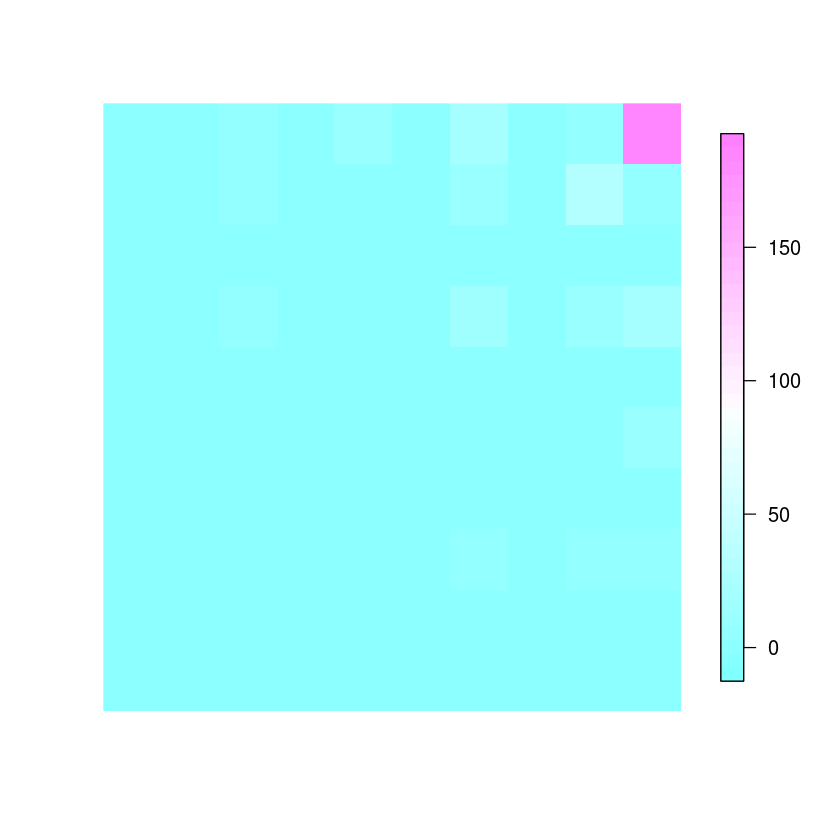

In [25]:
#options(repr.plot.width = 2, repr.plot.height = 2, repr.plot.res = 300)
# TODO - rotate plot once I figure out the problem
# TODO - put feature labels on the plot
image.plot(olympicDemeanCov,  zlim=c(-10,190), axes=FALSE,col = cm.colors(40))

List of 2
 $ values : num [1:10] 189.908 33.69 8.766 0.885 0.487 ...
 $ vectors: num [1:10, 1:10] 0.004504 -0.008496 0.029493 -0.000715 0.045589 ...


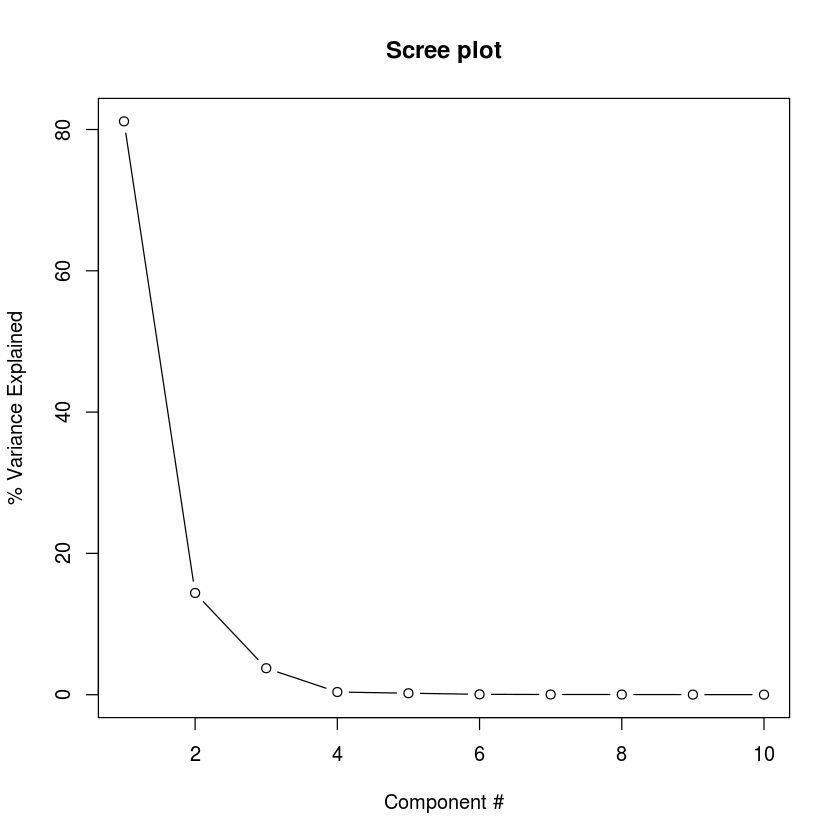

In [8]:
olympicEig = eigen(olympicDemeanCov)
str(olympicEig)
olympicPCVarEx = (olympicEig$values / sum(olympicEig$values)) * 100.0
plot(olympicPCVarEx, type='b', xlab='Component #', ylab='% Variance Explained', main="Scree plot")

In [24]:
# Normalize PCs to unit length
olympicPCALoadings = olympicEig$vectors / norm(olympicEig$vectors, type="2")

# TODO
# visualize the loadings

In [12]:
# create scores
olympicPCAScores = olympicDemean %*% olympicPCALoadings

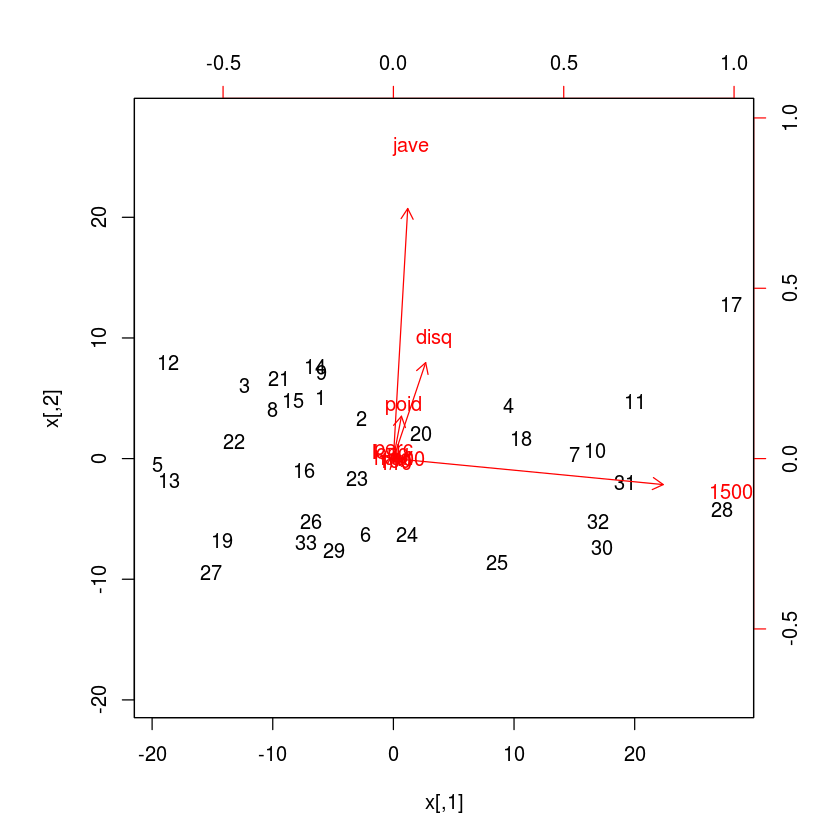

In [13]:
# set the original variables names to be the row names of PCA Loadings
rownames(olympicPCALoadings) = colnames(olympicMat)

# make a bilplot showing the scores and loadings for the first 2 PCs
biplot(olympicPCAScores[,1:2], olympicPCALoadings[,1:2])

In [14]:
# Use the built-in R function that does PCA using eigenvalue decomposition of the covariance matrix
olympicPCAEig = princomp(olympic$tab)

# Let's check whether the scores and loadings that we calculated are the same as those the R function calculated
# Use abs() because some of the PCs are flipped, which doesn't matter except that the scores will be flipped too 
all.equal(abs(olympicPCAScores), abs(olympicPCAEig$scores), check.attributes = FALSE, check.names=FALSE)
all.equal(abs(olympicPCALoadings), abs(as.matrix(olympicPCAEig$loadings[,])), check.attributes = FALSE, check.names=FALSE)

[1] TRUE

[1] TRUE

In [15]:
# reconstruct the data
reconstructedData = t(t(olympicPCAScores %*% t(olympicPCALoadings)) + colMeans(olympicMat))
all.equal(reconstructedData, olympicMat, , check.attributes = FALSE, check.names=FALSE)

[1] TRUE

## Correlation vs. Covariance

TODO

In [16]:
# now let's scale the the data instead of just demeaning it
olympicScale = scale(olympicMat, center=TRUE, scale=TRUE)

In [17]:
# and get the covariance matrix for the scaled data
olympicScaleCov = cov(olympicScale) 

[1] TRUE

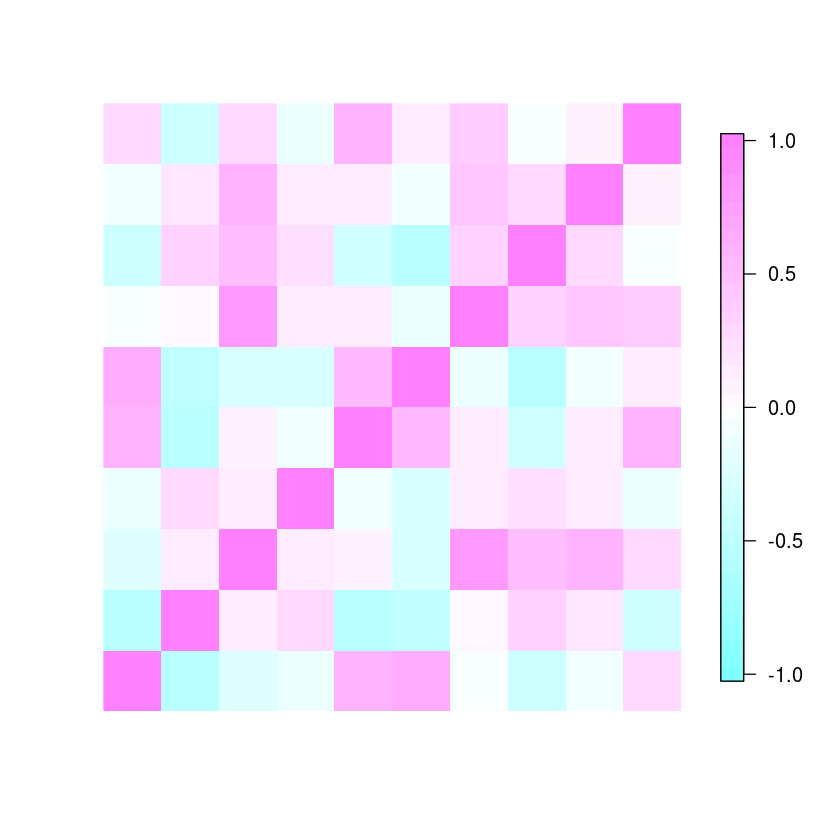

In [27]:
# get the correlation matrix of the original data
olympicCorr = cor(olympicMat)
all.equal(olympicScaleCov, olympicCorr, , check.attributes = FALSE, check.names=FALSE)

# TODO - try to use the blue red color scheme from corrplot 
# TODO - put feature labels on the plot
# TODO - figure out why this plot is rotated 90 degrees (the diagonal should go top-left to bottom-right)
image.plot(olympicCorr,  zlim=c(-1,1), axes=FALSE,col = cm.colors(40))

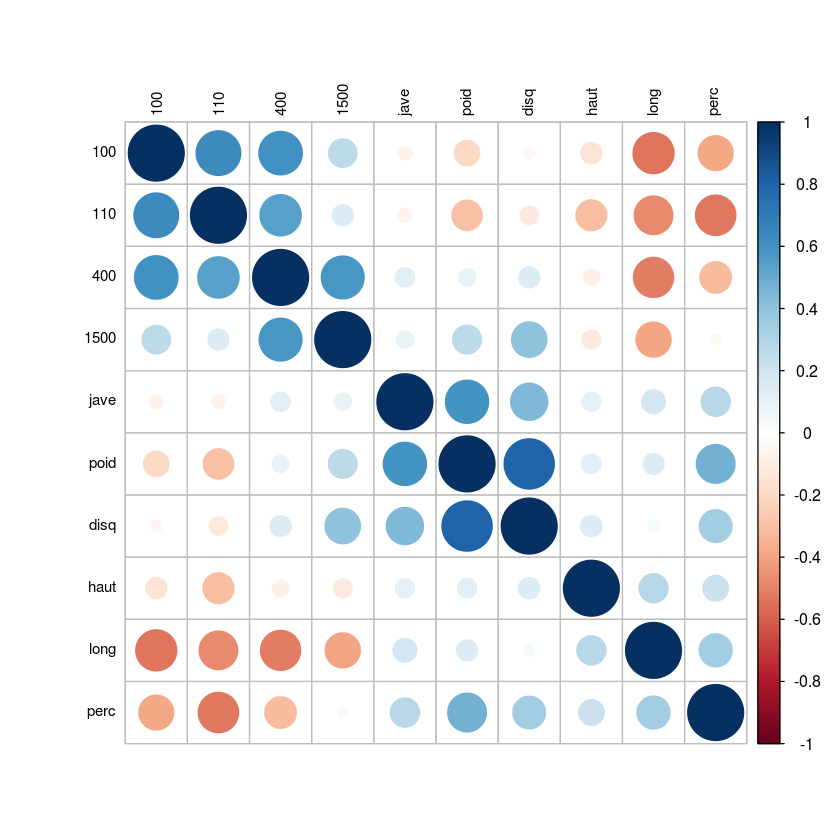

In [31]:
library(corrplot)
?corrplot
# TODO - flip the color scale so Red is positive and blue is negative.
corrplot(olympicCorr, order = "hclust", tl.col='black', tl.cex=.75)

List of 2
 $ values : num [1:10] 3.418 2.606 0.943 0.878 0.557 ...
 $ vectors: num [1:10, 1:10] 0.416 -0.394 -0.269 -0.212 0.356 ...


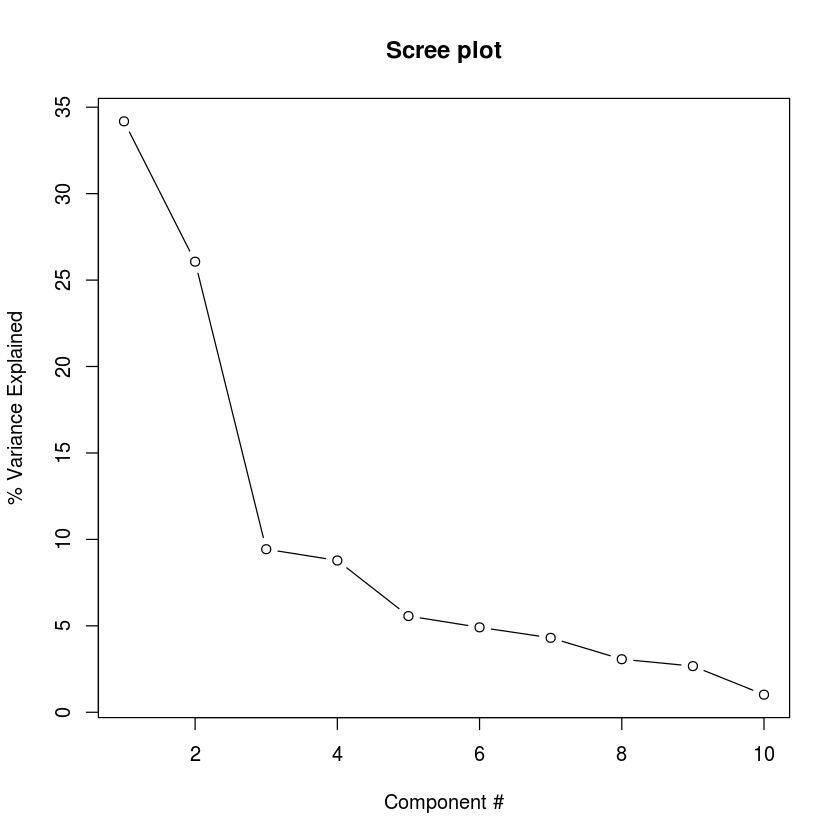

In [21]:
# now let's redo the eigenvalue decomposition and recreate the scores using the correlation matrix instead
olympicCorrEig = eigen(olympicCorr)
str(olympicCorrEig)

# calculate the variance explained by dividing each eigenvalue by the sum of all the eigenvalues
olympicCorrPCVarEx = (olympicCorrEig$values / sum(olympicCorrEig$values)) * 100.0

# TODO - plot the two scree plots side by side
# make the scree plot
plot(olympicCorrPCVarEx, type='b', xlab='Component #', ylab='% Variance Explained', main="Scree plot")

In [22]:
# calculate the loadings by scaling the eigenvectors to unit lenght (i.e. 1)
olympicCorrPCALoadings = olympicCorrEig$vectors / norm(olympicCorrEig$vectors, type="2")

# TODO
# visualize the loadings

In [23]:
# create the scores by multiplying the scaled data with the loadings 
olympicCorrPCAScores = olympicScale %*% olympicCorrPCALoadings

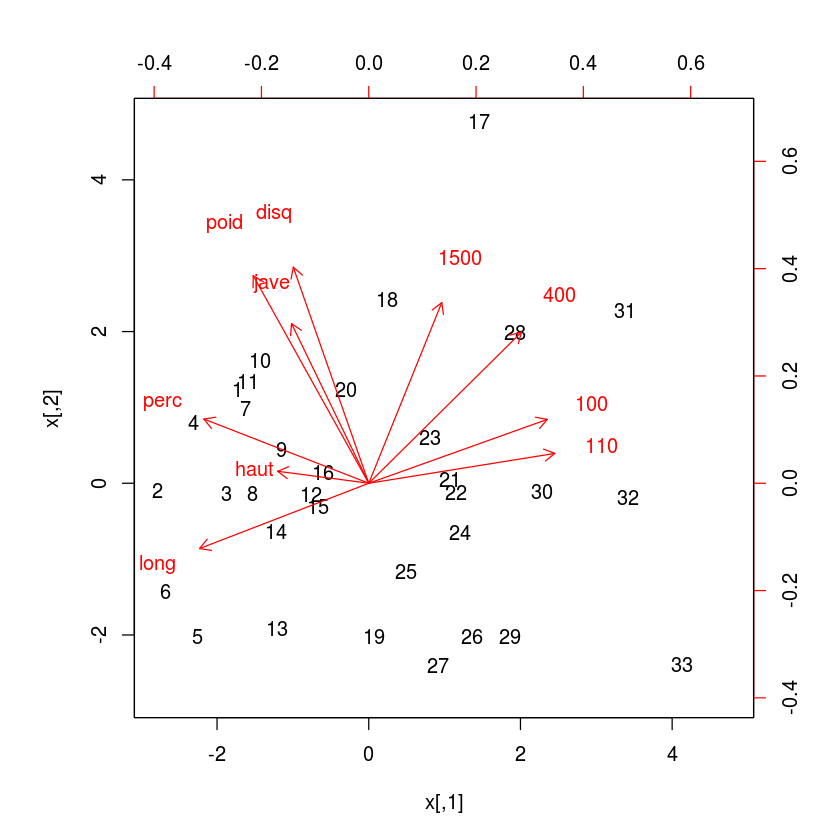

In [20]:
rownames(olympicCorrPCALoadings) = colnames(olympicMat)

# TODO - plot the two biplots side by side
# TODO - add better axis titles
# make a bilplot showing the scores and loadings for the first 2 PCs
biplot(olympicCorrPCAScores[,1:2], olympicCorrPCALoadings[,1:2])

### Least squares vs. PCA

TODO

In [ ]:
# take two decatholon variables that are correlated, plot them, do PCA and OLS, and plot errors in both

### SVD (Maximizing Projection Variance)

TODO

Explain the difference between SVD and Eig

In [ ]:
olympicPCASVD = prcomp(olympic$tab)
all.equal(abs(olympicPCASVD$x), abs(olympicPCA$scores), check.attributes = FALSE, check.names=FALSE)

## Example: Eigenfaces